In [52]:
# load the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%autosave 0

X = pd.read_csv("data/train.csv")
X_test = pd.read_csv("data/test.csv")

Autosave disabled


In [53]:
X.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
# check null values

null_columns=X.columns[X.isnull().any()]
X.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
# title from name looks interesting because you can get if the person is married or not and guess their age if it is not known

import re

#A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    #If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

X["Title"] = X["Name"].apply(get_title)
X_test["Title"] = X_test["Name"].apply(get_title)

X["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Mme           1
Sir           1
Capt          1
Lady          1
Don           1
Ms            1
Countess      1
Jonkheer      1
Name: Title, dtype: int64

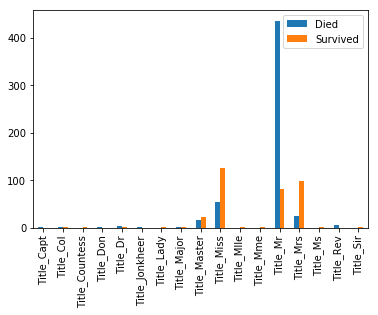

In [56]:
# We can see here that most people with Mr in their title died while Miss and Mrs survived

title_survive = X[["Title", "Survived"]]
title_survive_transformed = pd.get_dummies(title_survive, columns=["Title"])

bar = title_survive_transformed.groupby("Survived").apply(lambda column: column.sum()).transpose().drop(["Survived"])
bar.columns = ["Died","Survived"]
bar.plot.bar()

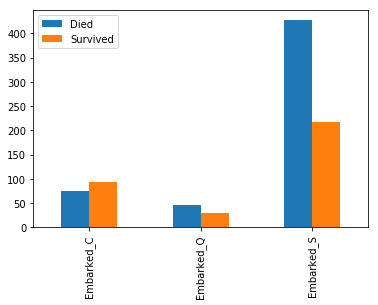

In [57]:
# you can see that you had a greater chance to survive if you were in embarked C or Q

embarked_survive = X[["Survived", "Embarked"]]
embarked_survive_transformed = pd.get_dummies(embarked_survive, columns=["Embarked"])

e_bar = embarked_survive_transformed.groupby("Survived").apply(lambda column: column.sum()).transpose().drop(["Survived"])
e_bar.columns = ["Died","Survived"]
e_bar.plot.bar()

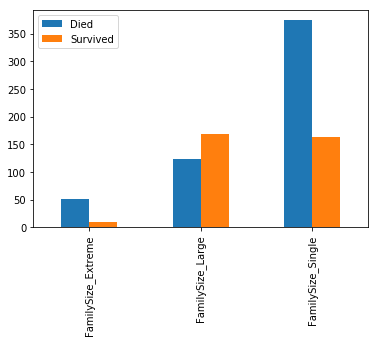

In [75]:
X["FamilySize"] = 1 + X["SibSp"] + X["Parch"]
X_test["FamilySize"] = 1 + X_test["SibSp"] + X_test["Parch"]
family_size = X["FamilySize"].apply(lambda row: "Single" if row == 1 else ("Large" if row < 5 else "Extreme"))     
family_size_test = X_test["FamilySize"].apply(lambda row: "Single" if row == 1 else ("Large" if row < 5 else "Extreme"))     
X["FamilySize"] = family_size

family_size = pd.DataFrame(family_size)
family_size["Survived"] = X["Survived"]
family_size_transformed = pd.get_dummies(family_size, columns=["FamilySize"])

X_test["FamilySize"] = family_size_test

f_bar = family_size_transformed.groupby("Survived").apply(lambda column: column.sum()).transpose().drop(["Survived"])
f_bar.columns = ["Died","Survived"]
f_bar.plot.bar()

In [76]:
# fill NaN values with mean so that we can do transformations

X.fillna(X.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.592481,1,0,A/5 21171,-0.502445,NaN,S,Mr,Large
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.638789,1,0,PC 17599,0.786845,C85,C,Mrs,Large
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.284663,0,0,STON/O2. 3101282,-0.488854,NaN,S,Miss,Single
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.407926,1,0,113803,0.420730,C123,S,Mrs,Large
4,5,0,3,"Allen, Mr. William Henry",male,0.407926,0,0,373450,-0.486337,NaN,S,Mr,Single


In [77]:
# Age and Fares are on different scales, so let's scale them

from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit_transform(X[['Age', 'Fare']])
X[["Age", "Fare"]] = std_scale
std_scale_test = preprocessing.StandardScaler().fit_transform(X_test[['Age', 'Fare']])
X_test[["Age", "Fare"]] = std_scale_test
std_scale

array([[ -5.92480600e-01,  -5.02445171e-01],
       [  6.38789012e-01,   7.86845294e-01],
       [ -2.84663197e-01,  -4.88854258e-01],
       ..., 
       [ -2.23290646e-16,  -1.76263239e-01],
       [ -2.84663197e-01,  -4.43810379e-02],
       [  1.77062908e-01,  -4.92377828e-01]])

In [78]:
# transform form categorical to numerical

X_transformed = pd.get_dummies(X, columns = ["Sex", "FamilySize", "Cabin", "Title", "Embarked"])
X_test_transformed = pd.get_dummies(X_test, columns = ["Sex", "FamilySize", "Cabin", "Title", "Embarked"])

In [79]:
X_transformed.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",-0.592481,1,0,A/5 21171,-0.502445,0,...,0,0,1,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.638789,1,0,PC 17599,0.786845,1,...,0,0,0,1,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",-0.284663,0,0,STON/O2. 3101282,-0.488854,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.407926,1,0,113803,0.420730,1,...,0,0,0,1,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0.407926,0,0,373450,-0.486337,0,...,0,0,1,0,0,0,0,0,0,1


In [80]:
# correlations

corr_matrix = X_transformed.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived                 1.000000
Sex_female               0.543351
Title_Mrs                0.339040
Title_Miss               0.327093
FamilySize_Large         0.279855
Fare                     0.257307
Embarked_C               0.168240
Title_Master             0.085221
Cabin_B96 B98            0.085083
Parch                    0.081629
Cabin_F33                0.073642
Cabin_E101               0.073642
Cabin_C52                0.060095
Cabin_D33                0.060095
Cabin_B28                0.060095
Cabin_E33                0.060095
Cabin_F4                 0.060095
Cabin_D36                0.060095
Cabin_C93                0.060095
Cabin_D35                0.060095
Cabin_B77                0.060095
Cabin_C125               0.060095
Cabin_B49                0.060095
Cabin_B57 B59 B63 B66    0.060095
Cabin_B18                0.060095
Cabin_B35                0.060095
Cabin_C92                0.060095
Cabin_D20                0.060095
Cabin_E25                0.060095
Title_Mlle    

In [81]:
# remove columns that offer little help and the labels

y = X_transformed["Survived"]
X_fewer_columns = X_transformed.drop(["Survived", "Name", "Ticket", "PassengerId"], axis=1).copy()
X_test_fewer_columns = X_test_transformed.drop(["Name", "Ticket", "PassengerId"], axis=1).copy()

In [82]:
# Stochastic Gradient Descent Classifier

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
X_matrix = X_fewer_columns.as_matrix()
y_matrix = y.as_matrix()
sgd_clf.fit(X_matrix, y_matrix)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [83]:
# display all scores in one go

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, **options):
    plt.plot(fpr, tpr, linewidth=2, **options)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    
def display_all_scores(model, X):
    y_train_predictions = cross_val_predict(model, X, y_matrix, cv = 3)
    print("Scores for model:",model.__class__.__name__)
    print("Confusion metrics:", confusion_matrix(y_matrix, y_train_predictions))
    print("Precision score:", precision_score(y_matrix, y_train_predictions))
    print("Recall score:", recall_score(y_matrix, y_train_predictions))
    print("F1 score:", f1_score(y_matrix, y_train_predictions))
    y_scores = cross_val_predict(model, X, y_matrix, cv = 3, method="decision_function")
    fpr, tpr, thresholds = roc_curve(y, y_scores)
    plt.figure(figsize=(8, 6))
    plot_roc_curve(fpr, tpr)
    plt.show()

In [1]:
display_all_scores(sgd_clf, X_matrix)

NameError: name 'display_all_scores' is not defined

In [85]:
# let's see how we do if we remove more columns that do not look interesting

remove_some_cabins = [c for c in X_fewer_columns.columns 
                      if c[:6] != "Cabin_" 
                      and c != "Parch" 
                      and c != "SibSp" 
                      and c != "Title_Major"
                      and c != "Title_Rev"
                      and c != "Title_Sir"
                      and c != "Title_Jonkheer"
                      and c != "Title_Dr"
                      and c != "Title_Don"
                      and c != "Title_Countess"
                      and c != "Title_Col"
                      and c != "Title_Capt"
                      ]    
X_even_fewer_columns = X_fewer_columns[remove_some_cabins]
X_even_fewer_columns.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'FamilySize_Extreme',
       'FamilySize_Large', 'FamilySize_Single', 'Title_Lady', 'Title_Master',
       'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs',
       'Title_Ms', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [86]:
sgd_clf1 = SGDClassifier(random_state=42)
X_matrix = X_even_fewer_columns.as_matrix()
y_matrix = y.as_matrix()
sgd_clf1.fit(X_matrix, y_matrix)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

Scores for model: SGDClassifier
Confusion metrics: [[504  45]
 [130 212]]
Precision score: 0.824902723735
Recall score: 0.619883040936
F1 score: 0.707846410684


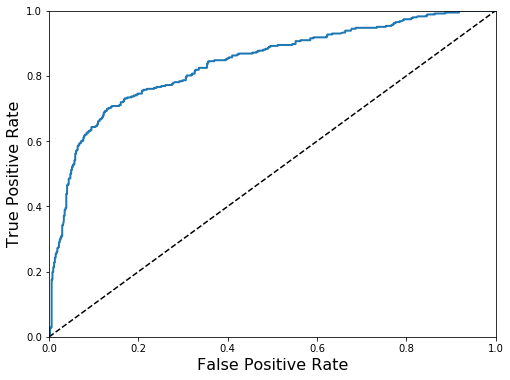

In [87]:
# As you can see this score is worse then the previous one 

display_all_scores(sgd_clf1, X_matrix)

In [71]:
# Let's check the Random Forest and you can see that it fares better

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

X_matrix = X_fewer_columns.as_matrix()
rf = RandomForestClassifier(n_jobs=2)
rf.fit(X_matrix, y_matrix) 

y_train_predictions = cross_val_predict(rf, X_matrix,y_matrix,cv=3)
scores = cross_val_score(rf, X_matrix, y_matrix, scoring='f1', cv=3)
print("F1 score for Random Forest", scores.mean())

F1 score for Random Forest 0.727883412153


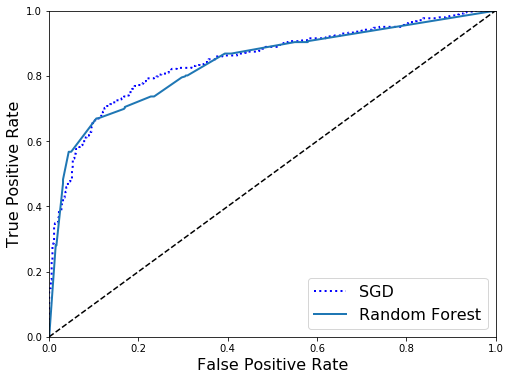

In [72]:
# ROC Curve for SGD vs RFC, showing that they perform about the same

y_probas_forest = cross_val_predict(rf, X_matrix, y_matrix, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_matrix, y_scores_forest)

y_scores_sgd = cross_val_predict(sgd_clf, X_matrix, y_matrix, cv = 3, method="decision_function")
fpr, tpr, thresholds = roc_curve(y, y_scores_sgd)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, label="Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [90]:
# Let's see how it performs on the test sample

# make the columns equal in number
for column in X_fewer_columns.columns:
    if column not in X_test_fewer_columns.columns:
        X_test_fewer_columns[column] = 0
        
for column in X_test_fewer_columns.columns:
    if column not in X_fewer_columns.columns:
        X_test_fewer_columns.drop([column], axis=1, inplace=True)
        

X_test_matrix = X_test_fewer_columns.as_matrix()
test_predictions = rf.predict(X_test_matrix)
test_predictions_sgd = sgd_clf.predict(X_test_matrix)

submission = pd.DataFrame(
    {
        "PassengerId": X_test["PassengerId"],
        "Survived": test_predictions
    }
)
submission_sgd = pd.DataFrame(
    {
        "PassengerId": X_test["PassengerId"],
        "Survived": test_predictions_sgd
    }
)

submission.to_csv("data/titanic_submission.csv", index=False) # both score about 0.72
submission_sgd.to_csv("data/titanic_submission_sgd.csv", index=False)